In [17]:
# !jt -l

In [18]:
# !jt -t gruvboxd

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import os
# for dirname, _, filenames in os.walk('Historical Product Demand'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
df = pd.read_csv("Product.csv",parse_dates=['Date'])
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [21]:
# Check Shape & data Types

print(df.shape)
print(df.dtypes)

(1048575, 5)
Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object


In [22]:
# to check columns if they have any missing values, it will return number of Nan in the given columns

df.isnull().sum()

# Mssing values are in dates
# calculating % of data missing
print("% of Data missing =", df.isnull().sum().sum()/len(df)*100)

% of Data missing = 1.0718355863910547


In [23]:
# Data missing is approxiately 1% of actual data, so we can remove it using Dropna

df.dropna(axis=0, inplace=True) #remove all rows with Nan

#setting date as index columns
df.reset_index(drop = True)
df.isnull().sum()

# Now there is no missing data

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [24]:
df.sort_values('Date')[10:20]
# Some value in Order_Demand column has (), therefore need tro remove before converting them into integer

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
121820,Product_0202,Whse_A,Category_007,2011-11-04,(100)
121819,Product_0202,Whse_A,Category_007,2011-11-04,(400)
131028,Product_2143,Whse_S,Category_009,2011-11-18,(25)
131031,Product_0131,Whse_S,Category_021,2011-11-18,(12)
131032,Product_0288,Whse_S,Category_021,2011-11-18,(50)
44450,Product_0980,Whse_A,Category_028,2011-11-18,4000
131027,Product_2138,Whse_S,Category_009,2011-11-18,(49)
131026,Product_2137,Whse_S,Category_009,2011-11-18,(25)
44795,Product_0965,Whse_A,Category_006,2011-11-18,1


In [25]:
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
df.sort_values('Date')[10:20]
# Now () are removed from the column

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
121820,Product_0202,Whse_A,Category_007,2011-11-04,100
121819,Product_0202,Whse_A,Category_007,2011-11-04,400
131028,Product_2143,Whse_S,Category_009,2011-11-18,25
131031,Product_0131,Whse_S,Category_021,2011-11-18,12
131032,Product_0288,Whse_S,Category_021,2011-11-18,50
44450,Product_0980,Whse_A,Category_028,2011-11-18,4000
131027,Product_2138,Whse_S,Category_009,2011-11-18,49
131026,Product_2137,Whse_S,Category_009,2011-11-18,25
44795,Product_0965,Whse_A,Category_006,2011-11-18,1


In [26]:
#Making the data type into integer
df['Order_Demand'] = df['Order_Demand'].astype('int64')

C:\Users\User\anaconda3\envs\exe\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


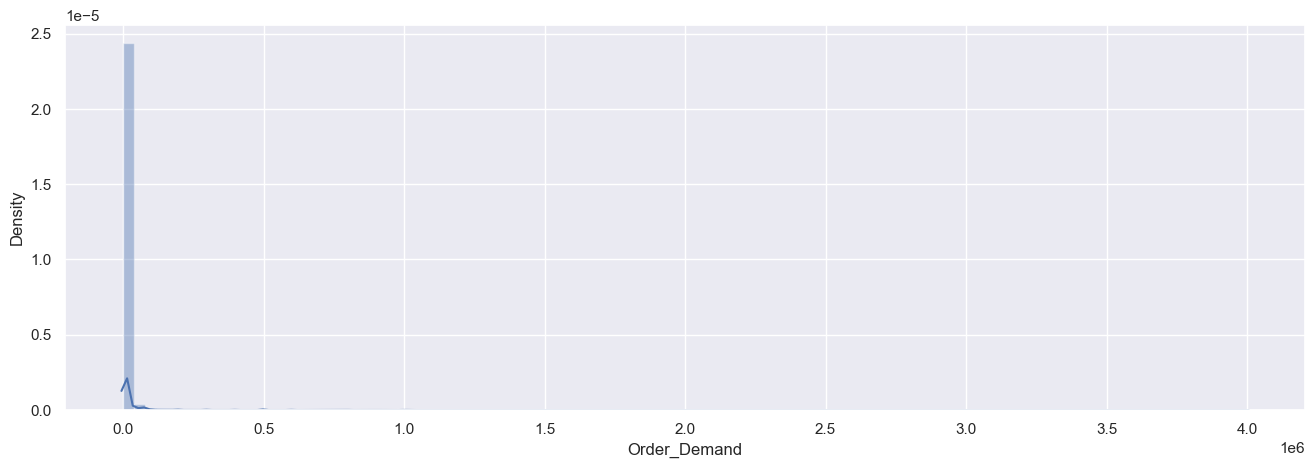

In [27]:
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df['Order_Demand'], bins = 100);
# it can seen that most of our demand lies between 0 to 500000, which is highly skewed

In [28]:
df.groupby('Warehouse')['Order_Demand'].sum().sort_values(ascending=False)
# It can be seen Warehouse J has maximum demand

Warehouse
Whse_J    3363200396
Whse_S    1038024700
Whse_C     585071404
Whse_A     147877431
Name: Order_Demand, dtype: int64

In [29]:
df1 = pd.DataFrame(df.groupby('Product_Category')['Order_Demand'].sum().sort_values(ascending=False))
df1["% Contribution"] = df1['Order_Demand']/df1['Order_Demand'].sum()*100
df1
# It can be seen starting top 4 products category contribute more than 90% of the demand

,Order_Demand,% Contribution
Product_Category,,
Category_019,4240159257,82.586981
Category_006,405571330,7.899447
Category_005,199674520,3.889127
Category_007,128691531,2.506567
Category_028,49055354,0.955467
Category_033,42610000,0.829929
Category_030,40966555,0.797919
Category_021,4480570,0.087270
Category_032,4473048,0.087123


In [30]:
# df2 = pd.pivot_table(df,index=["Date"],values=["Order_Demand"],columns=["Product_Category"],aggfunc=np.sum)
# df2.columns = df2.columns.droplevel(0)
# df2["Category_019"].dropna()
# Creating Pivot table with date as index, Product category as columns & and values as sum

In [31]:
# y = df2.resample('M').sum() # Resampling the data on monthly basis 
# y.index.freq = "M" # Setting datetime frequency to Month
# y.head(20)
# In Year 2011 so much data is missing, so we will exlude it 

In [32]:
df_019 = pd.DataFrame(y["Category_019"].iloc[12:-1]) # Including data from 2012 to 2016 end except last value
df_019.head()

NameError: name 'y' is not defined

In [ ]:
# pip install statsmodels 

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

span = 4
alpha = 2/(span+1)
df_019['EWMA4'] = df_019["Category_028"].ewm(alpha=alpha,adjust=False).mean() # Simple Weighted Moving Average
# Simple Exponentional Smoothing
# df_019['SES4']=SimpleExpSmoothing(df_019["Category_019"]).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

#Double Exponentional  Smothening
df_019['DESadd4'] = ExponentialSmoothing(df_019["Category_028"], trend='add').fit().fittedvalues.shift(-1)

In [ ]:
df_019[["Category_028",'SES4','DESadd4']].plot(figsize = (20,6)) # Plot for Weighted Moving average & Double Exponentional, 
#It can be seen data has some seasonailty, therefore will use ARIMA, ARMA

In [ ]:
# Will Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# ! pip install pmdarima 
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

In [ ]:
# to Check series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df_019["Category_019"])
# Series is non stationary

In [ ]:
fit = auto_arima(df_019["Category_019"], start_p=1, start_q=1,
                          max_p=5, max_q=5, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

fit.summary()
# After running Auto Arima, Best order is SARIMAX(3, 1, 3)x(0, 1, [1, 2], 12) for which AIC is minimum

In [ ]:
len(df_019["Category_019"])
# Train & Test Data
train = df_019["Category_019"].iloc[:48]
test = df_019["Category_019"].iloc[48:]

In [ ]:
model = SARIMAX(train,order=(3,1,3),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA (3,1,3),(0,1,1,12) Predictions')

In [ ]:
ax = test.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#plotting Test data & predicted demand

In [ ]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(test, predictions))
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')
print('Std of Test data:                  ', df_019["Category_019"].std())
# Comparison of RMSE & Std of data, as Std if very high compared to RMSE

In [ ]:
# Retrain the model on the full data, and forecasting for next 4 months
model = SARIMAX(df_019["Category_019"],order=(3,1,3),seasonal_order=(0,1,1,12))
results = model.fit()
fcast = results.predict(len(df_019["Category_019"]),len(df_019["Category_028"])+4,typ='levels').rename('SARIMA(3,1,3)(0,1,1,12) Forecast')

In [ ]:
ax = df_019["Category_028"].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#plotting actual data & 4 month forecasted demand

In [ ]:
# Same steps need to be done for each category, considering the missing data, stationarity. Finding the best order to be fit into the model and using the train test split to validate the model, Finally forecasting for the required Months.